In [34]:
import jax.numpy as np
from jax import random
import matplotlib.pyplot as plt

def sigmoid(X):
    return 1./(1 + np.exp(-X))

def add_bias(X):
    return np.concatenate([np.ones((X.shape[0],1)), X], axis=1)


jax_key = random.PRNGKey(0)

def one_layer_init(input_size, output_size):
    return random.uniform(key=jax_key, shape=(output_size, input_size + 1), minval=-3, maxval=3)

def compute_layer(A_j, Theta_j):
    z = np.dot(A_j, Theta_j.T)
    return sigmoid(z)

def n_layer_init(layer_sizes):
    weights = []
    for l_idx in range(len(layer_sizes)-1):
        weights.append( one_layer_init(input_size=layer_sizes[l_idx], output_size=layer_sizes[l_idx+1]) )
    return weights

def forward_prop(X, Thetas):
    A0 = add_bias(X)
    outputs = [A0]
    for theta in Thetas[:-1]:
        A = compute_layer(outputs[-1], theta)
        outputs.append( add_bias(A) )
    return outputs + [compute_layer(outputs[-1], Thetas[-1])]

def output_delta(A_j, Y):
    return A_j - Y

def weight_update(A_j, Delta_next, Theta_j, rate):
    return Theta_j - rate * np.dot(Delta_next.T, A_j)

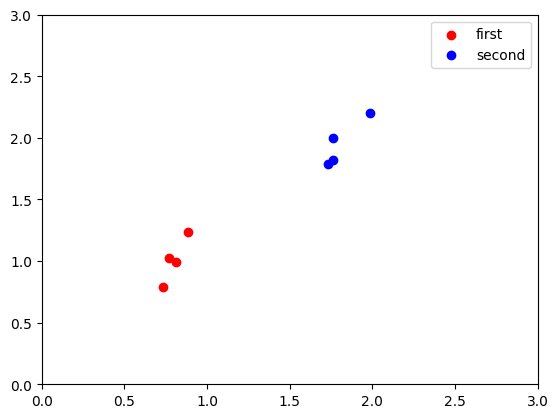

In [35]:
import numpy as np
scale = 0.2

start = 1

amount = 4



data = np.concatenate((
np.hstack((
    np.vstack(np.random.normal(start, scale, amount)),
    np.vstack(np.random.normal(start, scale, amount))
    )),
np.hstack((
    np.vstack(np.random.normal(start+1, scale, amount)),
    np.vstack(np.random.normal(start+1, scale, amount))
    ))
    ))



plt.scatter(np.random.normal(start, scale, amount) ,np.random.normal(start, scale, amount),color="r",label="first")
plt.xlim(0,3)
plt.ylim(0,3)
plt.scatter(np.random.normal(start+1, scale, amount) ,np.random.normal(start+1, scale, amount),color="b",label="second")
plt.legend()

labels= np.hstack(([1]*amount,[0]*amount))

In [36]:
print(n_layer_init([2,1]))
print(one_layer_init(2,1))

[Array([[ 2.7919285, -1.1119101,  0.7981796]], dtype=float32)]
[[ 2.7919285 -1.1119101  0.7981796]]


In [37]:
print(n_layer_init([2,2,1]))
forward_prop(data, n_layer_init([2,2,1]))

[Array([[ 0.44700265, -2.4018838 ,  1.4517953 ],
       [ 2.3650696 ,  0.57939935, -0.28048897]], dtype=float32), Array([[ 2.7919285, -1.1119101,  0.7981796]], dtype=float32)]


[array([[1.        , 0.75152424, 0.96648286],
        [1.        , 0.72041537, 1.51458569],
        [1.        , 1.14808981, 1.07071667],
        [1.        , 1.13283734, 0.80253019],
        [1.        , 1.9561729 , 2.0231739 ],
        [1.        , 2.01297316, 1.78349134],
        [1.        , 2.00425964, 2.19508499],
        [1.        , 1.90511117, 2.14667088]]),
 array([[1.        , 0.5112641 , 0.92617833],
        [1.        , 0.7141278 , 0.91354063],
        [1.        , 0.3194905 , 0.93877084],
        [1.        , 0.2480888 , 0.9424774 ],
        [1.        , 0.21177437, 0.94935763],
        [1.        , 0.14201418, 0.95396106],
        [1.        , 0.23501947, 0.94836987],
        [1.        , 0.26652484, 0.94617922]]),
 array([[0.95086056],
        [0.93860418],
        [0.9603037 ],
        [0.96332665],
        [0.96491317],
        [0.96756215],
        [0.96400018],
        [0.96270177]])]

In [38]:
output_delta(A_j=forward_prop(data, n_layer_init([2,2,1]))[-1], Y=labels)

array([[-0.04913944, -0.04913944, -0.04913944, -0.04913944,  0.95086056,
         0.95086056,  0.95086056,  0.95086056],
       [-0.06139582, -0.06139582, -0.06139582, -0.06139582,  0.93860418,
         0.93860418,  0.93860418,  0.93860418],
       [-0.0396963 , -0.0396963 , -0.0396963 , -0.0396963 ,  0.9603037 ,
         0.9603037 ,  0.9603037 ,  0.9603037 ],
       [-0.03667335, -0.03667335, -0.03667335, -0.03667335,  0.96332665,
         0.96332665,  0.96332665,  0.96332665],
       [-0.03508683, -0.03508683, -0.03508683, -0.03508683,  0.96491317,
         0.96491317,  0.96491317,  0.96491317],
       [-0.03243785, -0.03243785, -0.03243785, -0.03243785,  0.96756215,
         0.96756215,  0.96756215,  0.96756215],
       [-0.03599982, -0.03599982, -0.03599982, -0.03599982,  0.96400018,
         0.96400018,  0.96400018,  0.96400018],
       [-0.03729823, -0.03729823, -0.03729823, -0.03729823,  0.96270177,
         0.96270177,  0.96270177,  0.96270177]])

In [39]:
def hidden_delta(A_j, Delta_next, Theta_j):
    return A_j * (1-A_j) * np.dot(Delta_next, Theta_j)

In [40]:
print(n_layer_init([2,2,1]))

[Array([[ 0.44700265, -2.4018838 ,  1.4517953 ],
       [ 2.3650696 ,  0.57939935, -0.28048897]], dtype=float32), Array([[ 2.7919285, -1.1119101,  0.7981796]], dtype=float32)]


In [41]:
Theta_j=n_layer_init([2,2,1])
Theta_j[-1]= weight_update(
A_j=forward_prop(data, Theta_j)[-2], 
Delta_next=output_delta(A_j=forward_prop(data, Theta_j)[-1], Y=labels), 
Theta_j=Theta_j[-1], 
rate=0.9
)

In [42]:
hidden_delta(
A_j=forward_prop(data, Theta_j)[-2], 
Delta_next=output_delta(A_j=forward_prop(data, Theta_j)[-1], Y=labels), 
Theta_j=Theta_j[-1]
)

array([[-0.        ,  0.02741381, -0.00807567],
       [-0.        ,  0.02767079, -0.0114952 ],
       [-0.        ,  0.01947251, -0.00557316],
       [-0.        ,  0.01549491, -0.00489215],
       [-0.        ,  0.01327346, -0.00416087],
       [-0.        ,  0.00898452, -0.00354269],
       [-0.        ,  0.01464978, -0.00433623],
       [-0.        ,  0.01647881, -0.00465743]])

In [43]:
hidden_delta(
A_j=forward_prop(data, Theta_j)[-2], 
Delta_next=output_delta(A_j=forward_prop(data, Theta_j)[-1], Y=labels), 
Theta_j=Theta_j[-1]
)[:, 1:]

array([[ 0.02741381, -0.00807567],
       [ 0.02767079, -0.0114952 ],
       [ 0.01947251, -0.00557316],
       [ 0.01549491, -0.00489215],
       [ 0.01327346, -0.00416087],
       [ 0.00898452, -0.00354269],
       [ 0.01464978, -0.00433623],
       [ 0.01647881, -0.00465743]])

In [44]:
Theta_j[-2]=weight_update(
A_j=forward_prop(data, Theta_j)[-3], 

Delta_next=hidden_delta(
A_j=forward_prop(data, Theta_j)[-2], 
Delta_next=output_delta(A_j=forward_prop(data, Theta_j)[-1], Y=labels), 
Theta_j=Theta_j[-1]
)[:, 1:], 

Theta_j=Theta_j[-2], 
rate=0.9
)

In [45]:
hidden_delta(
        A_j=forward_prop(data, Theta_j)[-2], 
        Delta_next=output_delta(A_j=forward_prop(data, Theta_j)[-1], Y=labels), 
        Theta_j=Theta_j[-1])

array([[-0.        ,  0.02348796, -0.00637352],
       [-0.        ,  0.02868406, -0.00871349],
       [-0.        ,  0.01362563, -0.00430822],
       [-0.        ,  0.01079454, -0.00393674],
       [-0.        ,  0.00654969, -0.00289789],
       [-0.        ,  0.00434312, -0.0025773 ],
       [-0.        ,  0.00711335, -0.00294206],
       [-0.        ,  0.00842638, -0.00315401]])

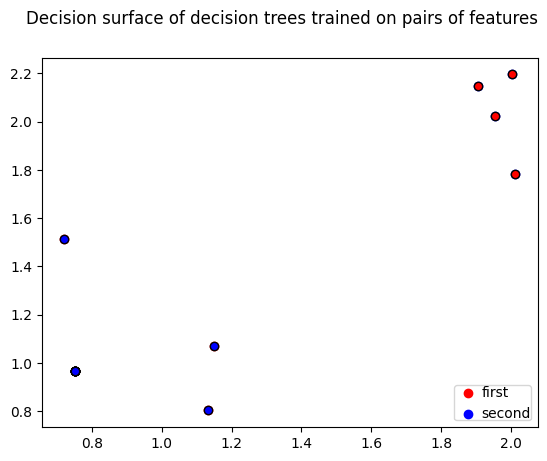

In [46]:
Theta_j=n_layer_init([2,2,1])
labels = np.vstack(labels)
for _ in range(500):
    Theta_j[1]= weight_update(
    A_j=forward_prop(data, Theta_j)[-2], 
    Delta_next=output_delta(A_j=forward_prop(data, Theta_j)[-1], Y=labels), 
    Theta_j=Theta_j[1], 
    rate=0.5
    )
    Theta_j[0]=weight_update(
    A_j=forward_prop(data, Theta_j)[-3], 

    Delta_next=hidden_delta(
        A_j=forward_prop(data, Theta_j)[-2], 
        Delta_next=output_delta(A_j=forward_prop(data, Theta_j)[-1], Y=labels), 
        Theta_j=Theta_j[1]
        )[:, 1:], 

    Theta_j=Theta_j[0], 
    rate=0.5
    )

idx0 = np.where(forward_prop(data,Theta_j)[-1] <= 0.5)
idx1 = np.where(forward_prop(data,Theta_j)[-1] > 0.5)

plt.scatter(data[:amount,0] ,data[:amount,1],color="r",label="first")


plt.scatter(data[amount:,0] ,data[amount:,1],color="b",label="second",)
plt.legend()


plt.scatter(data[idx0,0],data[idx0,1],color="r",          
            edgecolor="black")
plt.scatter(data[idx1,0],data[idx1,1],color="b",      
            edgecolor="black")


plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)



In [47]:
forward_prop(data,Theta_j)[-1]

array([[0.99891282],
       [0.99715714],
       [0.99623265],
       [0.99832028],
       [0.00192285],
       [0.00279362],
       [0.0013298 ],
       [0.0017184 ]])

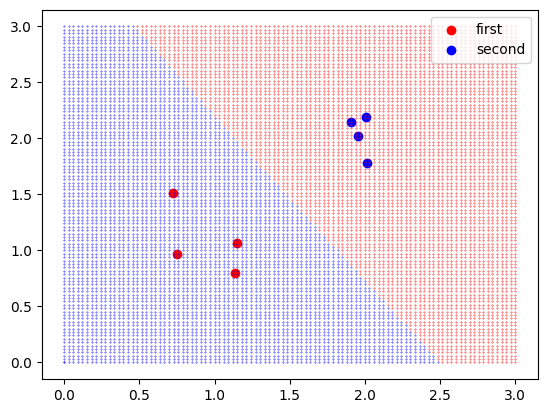

In [49]:
number_of_datapoints = 100
line = np.vstack(np.linspace(0,3,number_of_datapoints))
fakedata = np.array([[0,0]])
for datapoint in line:
    
    fakedata=np.vstack((fakedata,np.hstack((line,np.vstack(np.linspace(datapoint,datapoint,number_of_datapoints))))))
idx0 = np.where(forward_prop(fakedata,Theta_j)[-1][:,0] <= 0.5)
idx1 = np.where(forward_prop(fakedata,Theta_j)[-1][:,0] > 0.5)


plt.scatter(data[:amount,0] ,data[:amount,1],color="r",label="first")


plt.scatter(data[amount:,0] ,data[amount:,1],color="b",label="second",)
plt.legend()

plt.scatter(fakedata[idx0,0],fakedata[idx0,1],color="r",s=0.1)
plt.scatter(fakedata[idx1,0],fakedata[idx1,1],color="b",s=0.1)

